# Tarea 1

En esta tarea deberá implementar una generalización del mecanismo de Respuesta Aleatorizada.

Para generalizar el mecanismo de Respuesta Aleatorizada cambiaremos levemente la probabilidad con la que salen las caras y los sellos: La primera moneda que lancemos no será 'justa', sino que arrojará cara con probabilidad $p$ (y sello con probabilidad $1-p$). La segunda moneda sigue siendo justa (o sea, sale cara con probabilidad $1/2$ y sello con probabilidad $1/2$).

El mecanismo de Respuesta Aleatorizada Generalizado estará definido usando estas dos monedas:
1.   Si la primera moneda sale cara, responda la verdad.
2.   Si la primera moneda sale sello, lance una segunda moneda.

  1. Si la segunda moneda sale cara, responda **SÍ**.
  2. Si la segunda moneda sale sello, responda **NO**.

Sea $A$ la respuesta *real* de una determinada persona y sea $X$ la versión aleatorizada de esta respuesta creada por el mecanismo de Respuesta Aleatorizada Generalizada.

Luego
$$X=\begin{cases}
A \text{ con probabilidad }p\\
1 \text{ con probabilidad }\frac{1}{2}-\frac{p}{2}\\
0 \text{ con probabilidad }\frac{1}{2}-\frac{p}{2}
\end{cases}$$

Este mecanismo es $\ln\left(\frac{1+p}{1-p}\right)$-DP.

Como puede ver en el siguiente gráfico, a menor $p$, menor el parámetro de privacidad (lo que lo hace más privado) y a mayor $p$, mayor el parámetro de privacidad (lo que lo hace menos privado).


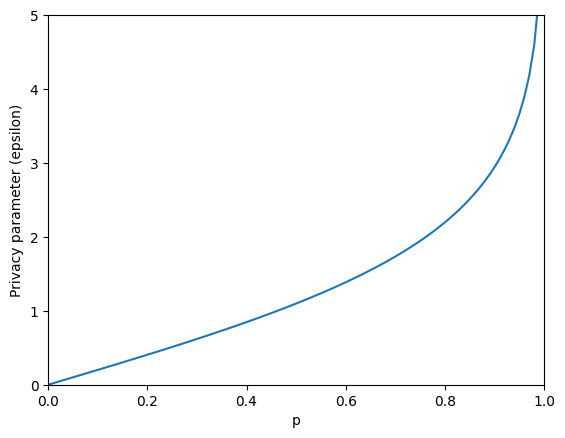

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 0.99, 100)
y = np.log((1+x)/(1-x))
plt.plot(x,y)
plt.xlabel('p')
plt.ylabel('Privacy parameter (epsilon)')
plt.axis([0,1,0,5])
plt.show()

Y, de hecho, cuando $p$ se acerca a $1$, epsilon crece hasta el infinito.

# Primera parte

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#importar base de datos entregada
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/4.a Analisis Diferencial/adult_with_pii.txt', sep=',')

df

,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,6/7/1988,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,8/6/1991,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,4/6/2009,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,9/16/1951,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Ardyce Golby,10/29/1961,212-61-8338,41328,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,Jean O'Connor,6/28/1952,737-32-2919,94735,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,Reuben Skrzynski,8/9/1966,314-48-0219,49628,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,Caye Biddle,5/19/1978,647-75-3550,8213,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Implemente el mecanismo de Respuesta Aleatorizada Generalizado. Para esto defina la función gen_randomized_response que recibe como parámetros una respuesta verdadera (ans) y una probabilidad (p).

**Nota**: Para simular el lanzamiento de una moneda cargada (que sale cara con probabilidad $p$), pueden (una vez instanciado el generador) ocupar rng.binomial(1, p)

Para más información sobre el método binomial, pueden leer la documentación de numpy: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

**Respuesta:**

In [5]:
rng = np.random.default_rng()

In [6]:
def gen_randomized_response_1(ans, p):
  #ans denota la respuesta real del encuestado: ans = 1 significa SÍ y ans = 0 significa NO

  if rng.binomial(1, p) == 1:
      return ans
  else:
      if rng.binomial(1, 0.5) == 1:
          return 1
      else:
          return 0

# Segunda parte

Use pandas para leer la base de datos (csv) entregada y cuente cuántas personas (del total de datos) tiene un Masters.

**Nota**: 'Masters' es una de las posibles respuestas del atributo 'Education'.

In [7]:
(df['Education']=='Masters').sum()

1723

# Tercera parte

Cree una lista con las respuestas (obtenidas de la base de datos) a la pregunta '¿Posee usted un Masters?'. Esta lista estará compuesta de 0 y 1.

Cuente cuántas respuestas 0 y 1 obtiene. Verifique que la cantidad de 1 coinciden con la cantidad de personas con Masters en la segunda parte.

Aplique Respuesta Aleatorizada Generalizada con $p=1/2$ a esa lista. Para esto defina una nueva función de Respuesta Aleatorizada Generalizada, pero que esta vez, en lugar de recibir una sola respuesta, recibe una lista/array de respuestas.



In [8]:
#Primero, creamos la lista "array_resp" donde tenemos 1 si la respuesta a si tiene un master es si, y cero en caso contrario
array_resp = df['Education'].apply(lambda x: 1 if 'Masters' in x else 0).tolist()


Ahora, contemos cuantas respuestas 0 y 1 obtenemos:

In [9]:
count_dict = {}

for name in array_resp:
    count_dict[name] = array_resp.count(name)

print(count_dict)

{0: 30838, 1: 1723}


Aqui podemos validar que las personas con el master son 1.723, las mismas que habiamos obtenido en el punto 2.

In [10]:
#Ahora creamos la función Respuesta Aleatorizada Generalizada, pero que esta vez, en lugar de recibir una sola respuesta, recibe una lista/array de respuestas.

def gen_randomized_response(array, p):
  yes_answers = 0
  for ans in array:
    yes_answers += gen_randomized_response_1(ans, p)
  return yes_answers



# Cuarta parte

Corra $100$ experimentos de Respuesta Aleatorizada Generalizada con $p=1/2$ y grafíquelos (puede guiarse por el tutorial 6).

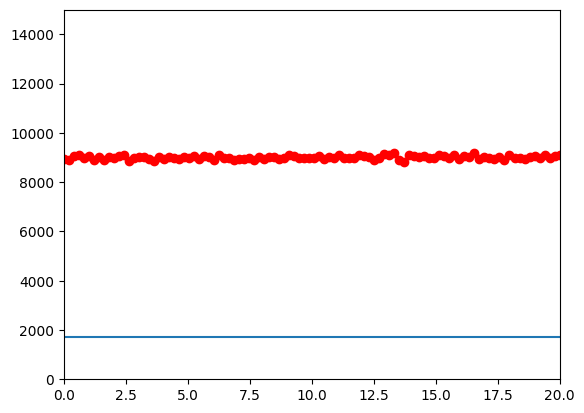

In [12]:
#Corramos 100 experimentos
x = np.linspace(0,20,100)
y = 1723+x-x
z = np.array([gen_randomized_response(array_resp, 0.5) for i in range(100)])
plt.plot(x,y,x,z,'ro')
plt.axis([0,20,0,15000])
plt.show()

Es posible evidenciar que el estimador $\tilde{Y}$ tiene un **sesgo**. Esto quiere decir que
$$\mathbb{E}[\tilde{Y}]\neq Y$$ 

# Quinta parte (opcional)

Dé una justificación de por qué
$$\mathbb{E}[\tilde{Y}]=Y\cdot p+\frac{n(1-p)}{2},$$
donde $Y$ es la cantidad de respuestas 'SÍ' de una pregunta hecha a $n$ personas, e $\tilde{Y}$ es la cantidad de respuestas 'SÍ' obtenidas por el mecanismo de Respuesta Aleatorizada Generalizado (con parámetro $p$).

**RESPUESTA:**

Supongamos que tenemos $n$ respuestas (en el ejemplo, $n=100$). Llamaremos $A_i$ a la **VERDADERA** respuesta del individuo $i$. Este $A_i$ puede ser $0$ o $1$.

Luego $$Y=\sum_{i=1}^{n}A_i,$$
pues cada sumando será o un $0$ o un $1$, y solo los $1$ (o sea, los SÍ) contribuyen a la suma.



$X_i$ es la respuesta del individuo $i$, la cual está aleatorizada por el mecanismo de Respuesta Aleatorizada (valga la redundancia).

Sea $A$ la respuesta *real* de una determinada persona y sea $X$ la versión aleatorizada de esta respuesta creada por el mecanismo de Respuesta Aleatorizada Generalizada.

Luego
$$X=\begin{cases}
A \text{ con probabilidad }p\\
1 \text{ con probabilidad }\frac{1}{2}-\frac{p}{2}\\
0 \text{ con probabilidad }\frac{1}{2}-\frac{p}{2}
\end{cases}$$

Luego, la esperanza de $X_i$ es:

$$\mathbb{E}[X_i] = {A_i}{p}+1(\frac{1}{2}-\frac{p}{2}) + 0(\frac{1}{2}-\frac{p}{2})$$

$$\mathbb{E}[X_i] = {A_i}{p} + \frac{1}{2}-\frac{p}{2}$$

$$\mathbb{E}[X_i] = {A_i}{p} + \frac{1}{2}(1-p)$$

Análogo a $Y$, que es la suma de los $A_i$, $\tilde{Y}$ es la suma de los $X_i$; esto es:
$$\tilde{Y}=\sum_{i=1}^{n}X_i$$


Por ende,
\begin{align*}
\mathbb{E}[\tilde{Y}]&=\mathbb{E}\left[\sum_{i=1}^{n} X_i\right]\\
&=\sum_{i=1}^{n}\mathbb{E}[X_i]\\
&=\sum_{i=1}^{n}\left({A_i}{p}+\frac{1}{2}(1-p)\right)\\
&={p}\sum_{i=1}^{n}A_i +\frac{1}{2}\sum_{i=1}^{n}(1-p)\\
&=Y\cdot p+\frac{n(1-p)}{2}
\end{align*}




# Sexta parte

Corrija el sesgo de la función definida en la tercera parte.

**Respuesta:**

Calcularemos $\mathbb{E}[\tilde{Y}]$ y usaremos este valor para transformar $\tilde{Y}$ en una variable aleatoria $Z$ que estimará a $Y$ y que será insesgado (o sea, $\mathbb{E}[Z]=Y$).

Si despejamos para $Y$ de la fórmula de la quinta parte, obtenemos que:
$$Y=\frac{1}{p}\mathbb{E}[\tilde{Y}]-\frac{n(1-p)}{2p}=\mathbb{E}\left[\frac{1}{p}\tilde{Y}-\frac{n(1-p)}{2p}\right]$$

Definiendo $Z=\frac{1}{p}\tilde{Y}-\frac{n(1-p)}{2p}$ obtenemos que $Z$ es un estimador insesgado de $Y$.

Así que en vez de usar $\tilde{Y}$ para estimar a $Y$, usaremos $Z$ para estimar a $Y$. Por lo tanto, la función corregida se ve asi:

In [25]:
def corrected_gen_rr(array, p):
 return ((1/p) *gen_randomized_response(array, p))- ((len(array)*(1-p))/(2*p))

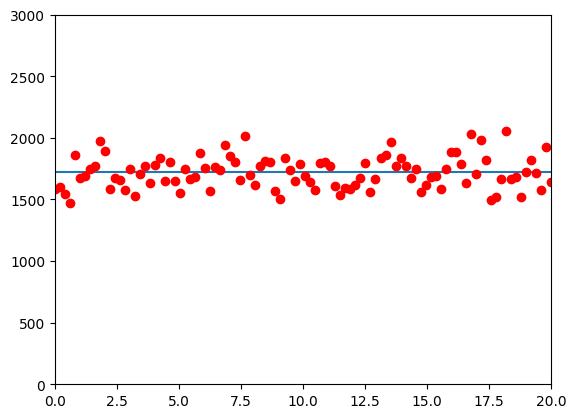

In [27]:
#Corramos 100 experimentos con el sesgo corregido
x = np.linspace(0,20,100)
y = 1723+x-x
z = np.array([corrected_gen_rr(array_resp, 0.5) for i in range(100)])
plt.plot(x,y,x,z,'ro')
plt.axis([0,20,0,3000])
plt.show()

Ahora, ya tenemos un estimador insesgado de $Y$.

# Séptima parte

Corra $100$ experimentos de Respuesta Aleatorizada con el sesgo corregido para:


1.   $p=0.1$
2.   $p=1/2$
3.   $p=3/4$
4.   $p=0.99$

y grafíquelos.


**RESPUESTA:**

Para p=0.1

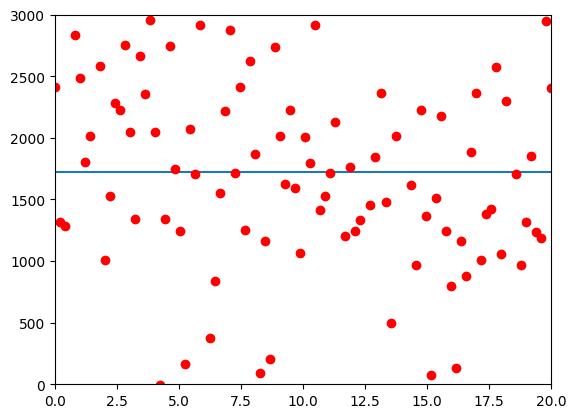

In [32]:
#Corramos 100 experimentos con el sesgo corregido
x1 = np.linspace(0,20,100)
y1 = 1723+x1-x1
z1 = np.array([corrected_gen_rr(array_resp, 0.1) for i in range(100)])
plt.plot(x1,y1,x1,z1,'ro')
plt.axis([0,20,0,3000])
plt.show()

Para p = 1/2

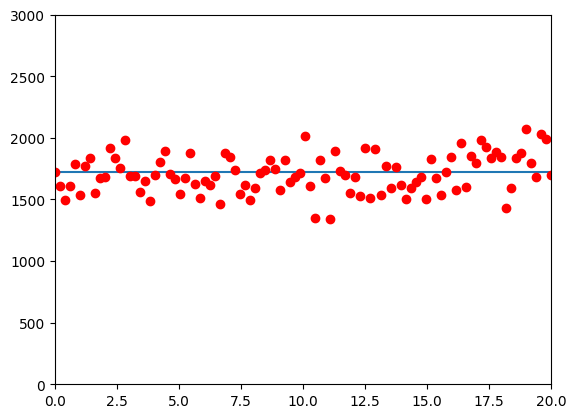

In [33]:
#Corramos 100 experimentos con el sesgo corregido
x2 = np.linspace(0,20,100)
y2 = 1723+x2-x2
z2 = np.array([corrected_gen_rr(array_resp, 0.5) for i in range(100)])
plt.plot(x2,y2,x2,z2,'ro')
plt.axis([0,20,0,3000])
plt.show()

Para p = 3/4

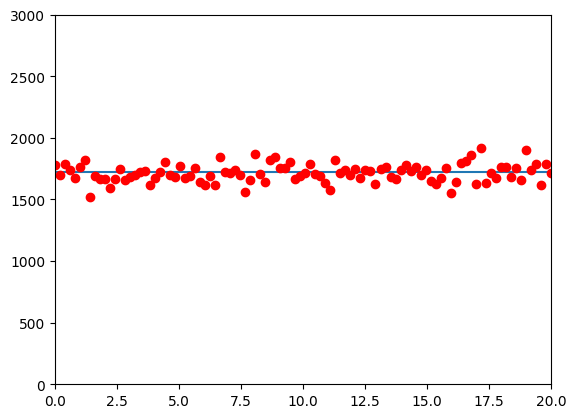

In [34]:
#Corramos 100 experimentos con el sesgo corregido
x3 = np.linspace(0,20,100)
y3 = 1723+x3-x3
z3 = np.array([corrected_gen_rr(array_resp, 0.75) for i in range(100)])
plt.plot(x3,y3,x3,z3,'ro')
plt.axis([0,20,0,3000])
plt.show()

Para p= 0.99

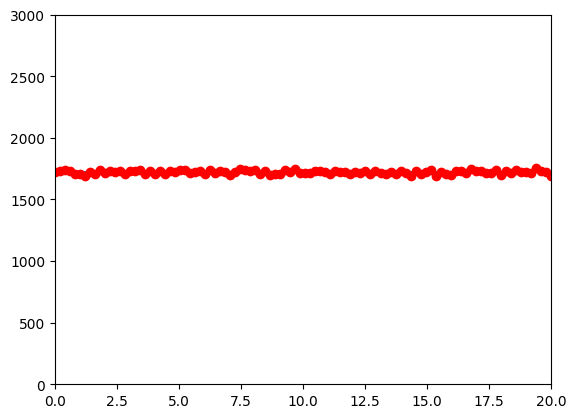

In [35]:
#Corramos 100 experimentos con el sesgo corregido
x4 = np.linspace(0,20,100)
y4 = 1723+x4-x4
z4 = np.array([corrected_gen_rr(array_resp, 0.99) for i in range(100)])
plt.plot(x4,y4,x4,z4,'ro')
plt.axis([0,20,0,3000])
plt.show()

# Octava parte

Calcule el error cuadrático medio (para cada $p$) de los experimentos corridos en la séptima parte.

El error cuadrático medio se calcula como:
$$\frac{1}{T}\sum_{i=1}^{T}(Y-\tilde{Y}_i)^2$$
donde $Y$ es el valor real de personas con un Masters (obtenido en la segunda parte) e $\tilde{Y}_i$ es el resultado del $i$-ésimo experimento. Como en la séptima parte hacemos $100$ experimentos (para cada $p$), entonces $T=100$.


**Nota**: Debe calcular el error cuadrático medio para $p=0.1$, $p=1/2$, $p=3/4$ y $p=0.99$.

Para $p=0.1$:

In [37]:
RSE_1 = (1/100)*np.sum(np.square(y1-z1))
RSE_1

858363.25

Para $p=1/2$:

In [38]:
RSE_2 = (1/100)*np.sum(np.square(y2-z2))
RSE_2

23757.77

Para $p=3/4$: :

In [39]:
RSE_3 = (1/100)*np.sum(np.square(y3-z3))
RSE_3

5454.289999999998

Para $p=0.99$:

In [40]:
RSE_4 = (1/100)*np.sum(np.square(y4-z4))
RSE_4

190.16898785838222

# Novena parte

Grafique el logaritmo del error cuadrático medio vs el parámetro de privacidad (recuerde que el parámetro de privacidad del mecanismo depende de $p$ y su fórmula es $\varepsilon=\ln\left(\frac{1+p}{1-p}\right)$), para los distintos $p$ pedidos en la séptima parte.

**RESPUESTA:**

Creamos primero una funcion que reciba los valores de $p$ y que nos devuelva el $\varepsilon$

In [41]:
import math

def calcular_e(p):
    resultado = math.log((1 + p) / (1 - p))
    return resultado


Calculemos $\varepsilon$ para cada uno de los $p$.

In [43]:
p_valores = [0.1, 0.5, 0.75, 0.99]

for p in p_valores:
    resultado = calcular_e(p)
    print(f"ln((1+{p})/(1-{p})) = {resultado}")

ln((1+0.1)/(1-0.1)) = 0.20067069546215124
ln((1+0.5)/(1-0.5)) = 1.0986122886681098
ln((1+0.75)/(1-0.75)) = 1.9459101490553132
ln((1+0.99)/(1-0.99)) = 5.293304824724491


Ahora grafiquemos:

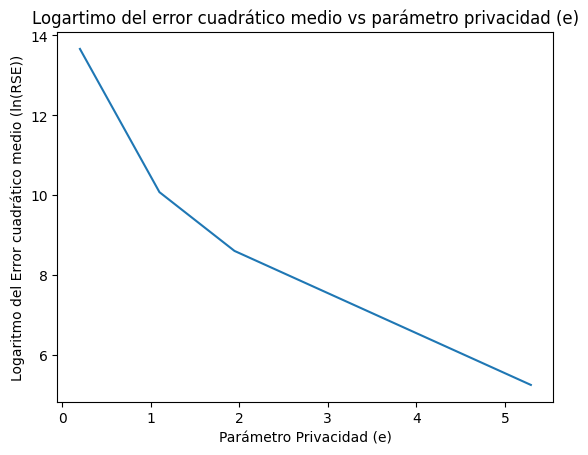

In [45]:
import math
import matplotlib.pyplot as plt

def calcular_ln(p):
    resultado = math.log((1 + p) / (1 - p))
    return resultado

p_valores = [0.1, 0.5, 0.75, 0.99]

#Calculemos el logaritmo natural de cada uno de los errores cuadráticos medios obtenidos
rse_valores = [RSE_1, RSE_2, RSE_3, RSE_4]
log_rse = []

for rse in rse_valores:
    log = math.log(rse)
    log_rse.append(log)

e = []
for p in p_valores:
    resultado = calcular_ln(p)
    e.append(resultado)

plt.plot(e, log_rse)
plt.xlabel("Parámetro Privacidad (e)")
plt.ylabel("Logaritmo del Error cuadrático medio (ln(RSE))")
plt.title("Logartimo del error cuadrático medio vs parámetro privacidad (e)")
plt.show()


Es posible concluir que, a medida que $\varepsilon$ se hace más grande, la privacidad es menor, la precisión es mejor. Y de manera inversa, entre más pequeño se hace $\varepsilon$, hay mayor privacidad y la precisión es menor.